### Data Preparation
1. Importing Libraries and Data Set
2. Understanding Data Set
3. Cleaning Data Set

#### 1.Importing Libraries and Data Set

In [18]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
#Importing Data
def importing_data():
    df=pd.read_csv("/work/Good_reads_Best_2000s/Data.csv")
    return df
df=importing_data()

#### 2.Understanding Data Set

In [20]:
#Showing first 5 row of dataset
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,"[['London, England', '(United Kingdom)'], ['Ho..."
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"['Young Adult', 'Fiction', 'Dystopia']",['Locus Award Nominee for Best Young Adult Boo...,"[['District 12, Panem', 'Capitol, Panem', 'Pan..."
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,[['Hogwarts School of Witchcraft and Wizardry'...
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[['Hogwarts School of Witchcraft and Wizardry,..."
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Bram Stoker Award for Works for Young Reader...,[['Hogwarts School of Witchcraft and Wizardry'...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   URL                5 non-null      object 
 1   Title              5 non-null      object 
 2   Author             5 non-null      object 
 3   Number of Ratings  5 non-null      float64
 4   Number of Reviews  5 non-null      float64
 5   Average Ratings    5 non-null      float64
 6   Number of Pages    5 non-null      float64
 7   Published Year     5 non-null      float64
 8   Series             5 non-null      float64
 9   Genres             5 non-null      object 
 10  Awards             5 non-null      object 
 11  Places             5 non-null      object 
dtypes: float64(6), object(6)
memory usage: 608.0+ bytes


We have 12 different columns which can be categorical or numerical data in our data set. Also, we can say that there are some non-values that we should take care of! Let's check how big they are.

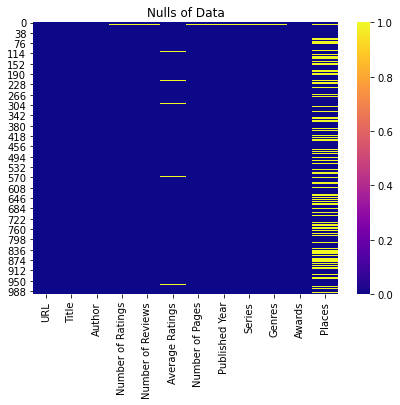

In [27]:
#Heat map of null cells
def plotting_null_data():
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(121)
    plt.title('Nulls of Data')
    sns.heatmap(df.isnull(), cmap='plasma')
    return plt.show()
plotting_null_data()

In [28]:
print("Percentage of Null Values")
missing_percentage = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage

Percentage of Null Values


URL                   0.0
Title                 0.0
Author                0.0
Number of Ratings     0.5
Number of Reviews     0.5
Average Ratings       2.2
Number of Pages       0.8
Published Year        0.6
Series                0.5
Genres                0.8
Awards                0.0
Places               32.9
dtype: float64

We have pretty less null value in our data set. Only "Places" have 32% null value.
## Filling the null data 
There are a lot of approaches for filling the data.
* For filling numerical data we will use mean values 
* For filling categorical data we will use mode values


**Filling numerical data**

In [36]:
#Filling numerical data of Number of Ratings
df['Number of Ratings'] = df['Number of Ratings'].fillna(df['Number of Ratings'].mean())
#Filling numerical data of Number of Reviews
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
#Filling numerical data of Average Ratings
df['Average Ratings'] = df['Average Ratings'].fillna(df['Average Ratings'].mean())
#Filling numerical data of Number of Pages
df['Number of Pages'] = df['Number of Pages'].fillna(df['Number of Pages'].mean())


**Filling categorical data**

In [42]:
#Filling categorical data of Published Year
df['Published Year'] = df['Published Year'].fillna(df['Published Year'].mode()[0])
#Filling categorical data of Series
df['Series'] = df['Series'].fillna(df['Series'].mode()[0])
#Filling categorical data of Genres
df['Genres'] = df['Genres'].fillna(df['Genres'].mode()[0])
#Filling categorical data of Places
df['Places'] = df['Places'].fillna(df['Places'].mode()[0])

Lets look at last status of data set

In [43]:
print("Percentage of Updated Null Values")
missing_percentage = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage

Percentage of Updated Null Values


URL                  0.0
Title                0.0
Author               0.0
Number of Ratings    0.0
Number of Reviews    0.0
Average Ratings      0.0
Number of Pages      0.0
Published Year       0.0
Series               0.0
Genres               0.0
Awards               0.0
Places               0.0
dtype: float64

Now we don't have any missing values!

Lets look at **basic statistical information** of our data set.

In [29]:
df.describe()

,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series
count,9.950000e+02,995.000000,978.000000,992.000000,994.00000,995.000000
mean,1.815787e+05,7786.791960,3.929346,412.304435,2006.05332,0.510553
std,4.269193e+05,13021.106839,0.253346,216.892706,2.64026,0.500140
min,1.500000e+01,0.000000,3.000000,6.000000,1998.00000,0.000000
25%,2.989800e+04,1796.000000,3.800000,302.000000,2004.00000,0.000000
50%,7.196400e+04,3669.000000,3.900000,374.000000,2006.00000,1.000000
75%,1.567095e+05,7983.000000,4.100000,472.250000,2008.00000,1.000000
max,6.685627e+06,175504.000000,4.800000,4100.000000,2018.00000,1.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0867bd3-5624-476b-af8a-bd1f917bd510' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>